In [1]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [2]:
#Import all relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [3]:
df = pd.read_csv('reduced_retail_transactions.csv')
df

,Transaction_ID,Date,Customer_Name,Product,Total_Items,Total_Cost,Payment_Method,City,Store_Type,Discount_Applied,Customer_Category,Season,Promotion
0,1000987231,2023-05-23 18:07:20,Jacqueline Maynard,"['Pancake Mix', 'Coffee', 'Ice Cream']",3,16.63,Credit Card,Houston,Specialty Store,True,Middle-Aged,Winter,NaN
1,1000079954,2022-03-10 16:47:15,David White,['Cleaning Spray'],5,7.46,Debit Card,Miami,Supermarket,False,Middle-Aged,Fall,BOGO (Buy One Get One)
2,1000567130,2022-07-22 17:02:17,Dr. Thomas Edwards,"['Salmon', 'Garden Hose', 'Deodorant', 'Air Fr...",9,52.27,Cash,Boston,Warehouse Club,True,Teenager,Fall,BOGO (Buy One Get One)
3,1000500891,2022-04-21 15:14:38,Kristin Collins,"['Power Strips', 'Tuna']",5,25.44,Cash,Los Angeles,Convenience Store,False,Homemaker,Spring,NaN
4,1000055399,2023-05-03 05:26:02,Robert Finley,"['Cereal', 'Cheese', 'Yogurt', 'Sponges', 'Chi...",6,86.05,Credit Card,Atlanta,Pharmacy,False,Professional,Fall,BOGO (Buy One Get One)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1000395942,2024-01-10 12:36:26,Sandra Alvarez,"['Cleaning Spray', 'Trash Cans', 'Toilet Paper...",6,61.57,Debit Card,Dallas,Pharmacy,False,Middle-Aged,Winter,BOGO (Buy One Get One)
99996,1000417771,2022-03-28 21:17:28,Madeline Lee,['Rice'],7,69.44,Credit Card,Houston,Specialty Store,False,Student,Winter,Discount on Selected Items
99997,1000937140,2022-03-18 20:34:18,Jason Mcmillan,"['Lawn Mower', 'Deodorant']",9,25.58,Cash,Miami,Pharmacy,False,Teenager,Winter,NaN
99998,1000794022,2022-08-22 07:23:28,Molly Townsend,"['Beef', 'Iron', 'Hand Sanitizer', 'Bath Towel...",5,5.83,Debit Card,Seattle,Warehouse Club,False,Student,Summer,BOGO (Buy One Get One)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Transaction_ID     100000 non-null  int64  
 1   Date               100000 non-null  object 
 2   Customer_Name      100000 non-null  object 
 3   Product            100000 non-null  object 
 4   Total_Items        100000 non-null  int64  
 5   Total_Cost         100000 non-null  float64
 6   Payment_Method     100000 non-null  object 
 7   City               100000 non-null  object 
 8   Store_Type         100000 non-null  object 
 9   Discount_Applied   100000 non-null  bool   
 10  Customer_Category  100000 non-null  object 
 11  Season             100000 non-null  object 
 12  Promotion          66475 non-null   object 
dtypes: bool(1), float64(1), int64(2), object(9)
memory usage: 9.3+ MB


In [5]:
#Check the occurrence of null values
df.isna().sum()

Transaction_ID           0
Date                     0
Customer_Name            0
Product                  0
Total_Items              0
Total_Cost               0
Payment_Method           0
City                     0
Store_Type               0
Discount_Applied         0
Customer_Category        0
Season                   0
Promotion            33525
dtype: int64

In [6]:
#Drop all rows with a null value
df.dropna(inplace=True)
len(df)

66475

In [7]:
#Check the occurrence of null values
df.isna().sum()

Transaction_ID       0
Date                 0
Customer_Name        0
Product              0
Total_Items          0
Total_Cost           0
Payment_Method       0
City                 0
Store_Type           0
Discount_Applied     0
Customer_Category    0
Season               0
Promotion            0
dtype: int64

In [8]:
# Check the distribution of transactions per country.
top10 = df["City"].value_counts().head(10)
top10

City
New York         6798
Seattle          6752
Boston           6679
Los Angeles      6671
Dallas           6661
Houston          6642
Chicago          6625
Atlanta          6576
Miami            6547
San Francisco    6524
Name: count, dtype: int64

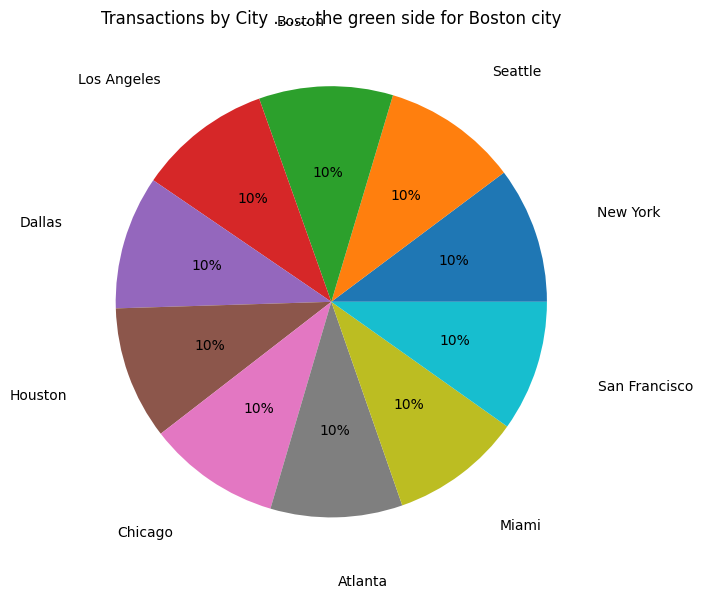

In [9]:
#Create a pie chart to show distribution of transactions
plt.figure(figsize=[7,7])
plt.pie(top10,labels=top10.index, autopct = '%0.0f%%',labeldistance=1.3)
plt.title("Transactions by City ....... the green side for Boston city")
plt.show()

In [10]:
import ast

# Convert the text in the 'Product' column to actual lists
df['Product'] = df['Product'].apply(ast.literal_eval)




In [11]:


# Filter the data for a specific city (e.g., Chicago)
df = df[df['City'] == 'New York']

# Convert the 'Product' column from lists to individual rows using explode()
df = df.explode('Product')

# Group the data by transaction and product
basket = df.groupby(['Transaction_ID', 'Product'])['Total_Items'].sum().unstack().fillna(0)

# Display the results
basket


Product,Air Freshener,Apple,BBQ Sauce,Baby Wipes,Banana,Bath Towels,Beef,Bread,Broom,Butter,...,Tomatoes,Toothbrush,Toothpaste,Trash Bags,Trash Cans,Tuna,Vacuum Cleaner,Vinegar,Water,Yogurt
Transaction_ID,,,,,,,,,,,,,,,,,,,,,
1000000012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1000000018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1000000431,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1000000518,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1000000858,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000998985,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,5.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,5.0
1000999090,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1000999101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
#Create function to hot encode the values
def encode_values(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

#Apply function to data
basket_encoded = basket.applymap(encode_values)


basket_encoded

/tmp/ipykernel_3931/2880195277.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_encoded = basket.applymap(encode_values)


Product,Air Freshener,Apple,BBQ Sauce,Baby Wipes,Banana,Bath Towels,Beef,Bread,Broom,Butter,...,Tomatoes,Toothbrush,Toothpaste,Trash Bags,Trash Cans,Tuna,Vacuum Cleaner,Vinegar,Water,Yogurt
Transaction_ID,,,,,,,,,,,,,,,,,,,,,
1000000012,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000000018,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000000431,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000000518,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000000858,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000998985,0,0,0,0,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,1
1000999090,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000999101,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
#filter for only Transactions with 2 or more Products
basket_filtered = basket_encoded[(basket_encoded > 0).sum(axis=1) >= 2]

basket_filtered

Product,Air Freshener,Apple,BBQ Sauce,Baby Wipes,Banana,Bath Towels,Beef,Bread,Broom,Butter,...,Tomatoes,Toothbrush,Toothpaste,Trash Bags,Trash Cans,Tuna,Vacuum Cleaner,Vinegar,Water,Yogurt
Transaction_ID,,,,,,,,,,,,,,,,,,,,,
1000000012,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000000018,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000000431,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000000518,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000000858,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000998135,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1000998561,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1000998985,0,0,0,0,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,1


In [14]:

#Generate the frequent itemsets
frequent_itemsets = apriori(basket_filtered, min_support=0.01, use_colnames=True).sort_values("support",ascending=False)
frequent_itemsets

/usr/local/python/3.12.1/lib/python3.12/site-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
73,0.078010,(Toothpaste)
75,0.049559,(Trash Cans)
2,0.048825,(BBQ Sauce)
18,0.047724,(Cleaning Spray)
38,0.047173,(Laundry Detergent)
...,...,...
32,0.036527,(Ice Cream)
36,0.035977,(Jam)
0,0.035609,(Air Freshener)
49,0.035426,(Paper Towels)


In [15]:
#Apply association rules
assoc_rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1).sort_values("lift",ascending=False).reset_index(drop=True)
assoc_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
